In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn import svm
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import RocCurveDisplay 
from sklearn.model_selection import GridSearchCV
from mlxtend.plotting import plot_confusion_matrix
import shap
# Turn off the warnings.
warnings.filterwarnings(action='ignore')
%matplotlib inline


# 1.Data Loading

In [2]:
Trained_Data = pd.read_csv("../input/nslkdd/KDDTrain+.txt" , sep = "," , encoding = 'utf-8')

In [3]:
Trained_Data

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125968,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125969,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125970,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


In [4]:
Columns = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot',
            'num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations',
            'num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count',
            'serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate',
            'dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate',
            'dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate',
            'dst_host_srv_rerror_rate','attack','level'])

In [5]:
Trained_Data.columns = Columns

In [6]:
Trained_Data.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21
5,0,tcp,private,S0,0,0,0,0,0,0,...,0.04,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,21
6,0,tcp,private,S0,0,0,0,0,0,0,...,0.06,0.07,0.00,0.00,1.00,1.00,0.0,0.00,neptune,21
7,0,tcp,remote_job,S0,0,0,0,0,0,0,...,0.09,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,21
8,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.06,0.00,0.00,1.00,1.00,0.0,0.00,neptune,21
9,0,tcp,private,REJ,0,0,0,0,0,0,...,0.05,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [7]:
Trained_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125972 non-null  int64  
 1   protocol_type                125972 non-null  object 
 2   service                      125972 non-null  object 
 3   flag                         125972 non-null  object 
 4   src_bytes                    125972 non-null  int64  
 5   dst_bytes                    125972 non-null  int64  
 6   land                         125972 non-null  int64  
 7   wrong_fragment               125972 non-null  int64  
 8   urgent                       125972 non-null  int64  
 9   hot                          125972 non-null  int64  
 10  num_failed_logins            125972 non-null  int64  
 11  logged_in                    125972 non-null  int64  
 12  num_compromised              125972 non-null  int64  
 13 

In [8]:
Trained_Data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
count,125972.000000,1.259720e+05,1.259720e+05,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,...,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000
mean,287.146929,4.556710e+04,1.977927e+04,0.000198,0.022688,0.000111,0.204411,0.001222,0.395739,0.279253,...,115.653725,0.521244,0.082952,0.148379,0.032543,0.284455,0.278487,0.118832,0.120241,19.504056
std,2604.525522,5.870354e+06,4.021285e+06,0.014086,0.253531,0.014366,2.149977,0.045239,0.489011,23.942137,...,110.702886,0.448950,0.188922,0.308998,0.112564,0.444785,0.445670,0.306559,0.319460,2.291512
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.000000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [9]:
Trained_Data.nunique()

duration                       2981
protocol_type                     3
service                          70
flag                             11
src_bytes                      3341
dst_bytes                      9326
land                              2
wrong_fragment                    3
urgent                            4
hot                              28
num_failed_logins                 6
logged_in                         2
num_compromised                  88
root_shell                        2
su_attempted                      3
num_root                         82
num_file_creations               35
num_shells                        3
num_access_files                 10
num_outbound_cmds                 1
is_host_login                     2
is_guest_login                    2
count                           512
srv_count                       509
serror_rate                      89
srv_serror_rate                  86
rerror_rate                      82
srv_rerror_rate             

In [10]:
Trained_Data.max()

duration                             42908
protocol_type                          udp
service                              whois
flag                                    SH
src_bytes                       1379963888
dst_bytes                       1309937401
land                                     1
wrong_fragment                           3
urgent                                   3
hot                                     77
num_failed_logins                        5
logged_in                                1
num_compromised                       7479
root_shell                               1
su_attempted                             2
num_root                              7468
num_file_creations                      43
num_shells                               2
num_access_files                         9
num_outbound_cmds                        0
is_host_login                            1
is_guest_login                           1
count                                  511
srv_count  

In [11]:
Results = set(Trained_Data['attack'].values)
print(Results,end=" ")

{'perl', 'nmap', 'warezmaster', 'normal', 'warezclient', 'phf', 'satan', 'neptune', 'guess_passwd', 'back', 'pod', 'loadmodule', 'buffer_overflow', 'rootkit', 'multihop', 'imap', 'teardrop', 'portsweep', 'land', 'spy', 'ftp_write', 'smurf', 'ipsweep'} 

In [12]:
Trained_attack = Trained_Data.attack.map(lambda a: 0 if a == 'normal' else 1)
Trained_Data['attack_state'] = Trained_attack

In [13]:
Trained_Data.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,attack_state
0,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15,0
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19,1
2,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21,0
3,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21,0
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21,1
5,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,21,1
6,0,tcp,private,S0,0,0,0,0,0,0,...,0.07,0.00,0.00,1.00,1.00,0.0,0.00,neptune,21,1
7,0,tcp,remote_job,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,21,1
8,0,tcp,private,S0,0,0,0,0,0,0,...,0.06,0.00,0.00,1.00,1.00,0.0,0.00,neptune,21,1
9,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21,1



# 2 Data preprocessing


In [14]:
#Chechking for Missing Data
Trained_Data.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [15]:
# Checking for Duplicates
Trained_Data.duplicated().sum()

0


## 2.1 Handling Outliers

In [16]:
Trained_Data.shape

(125972, 44)

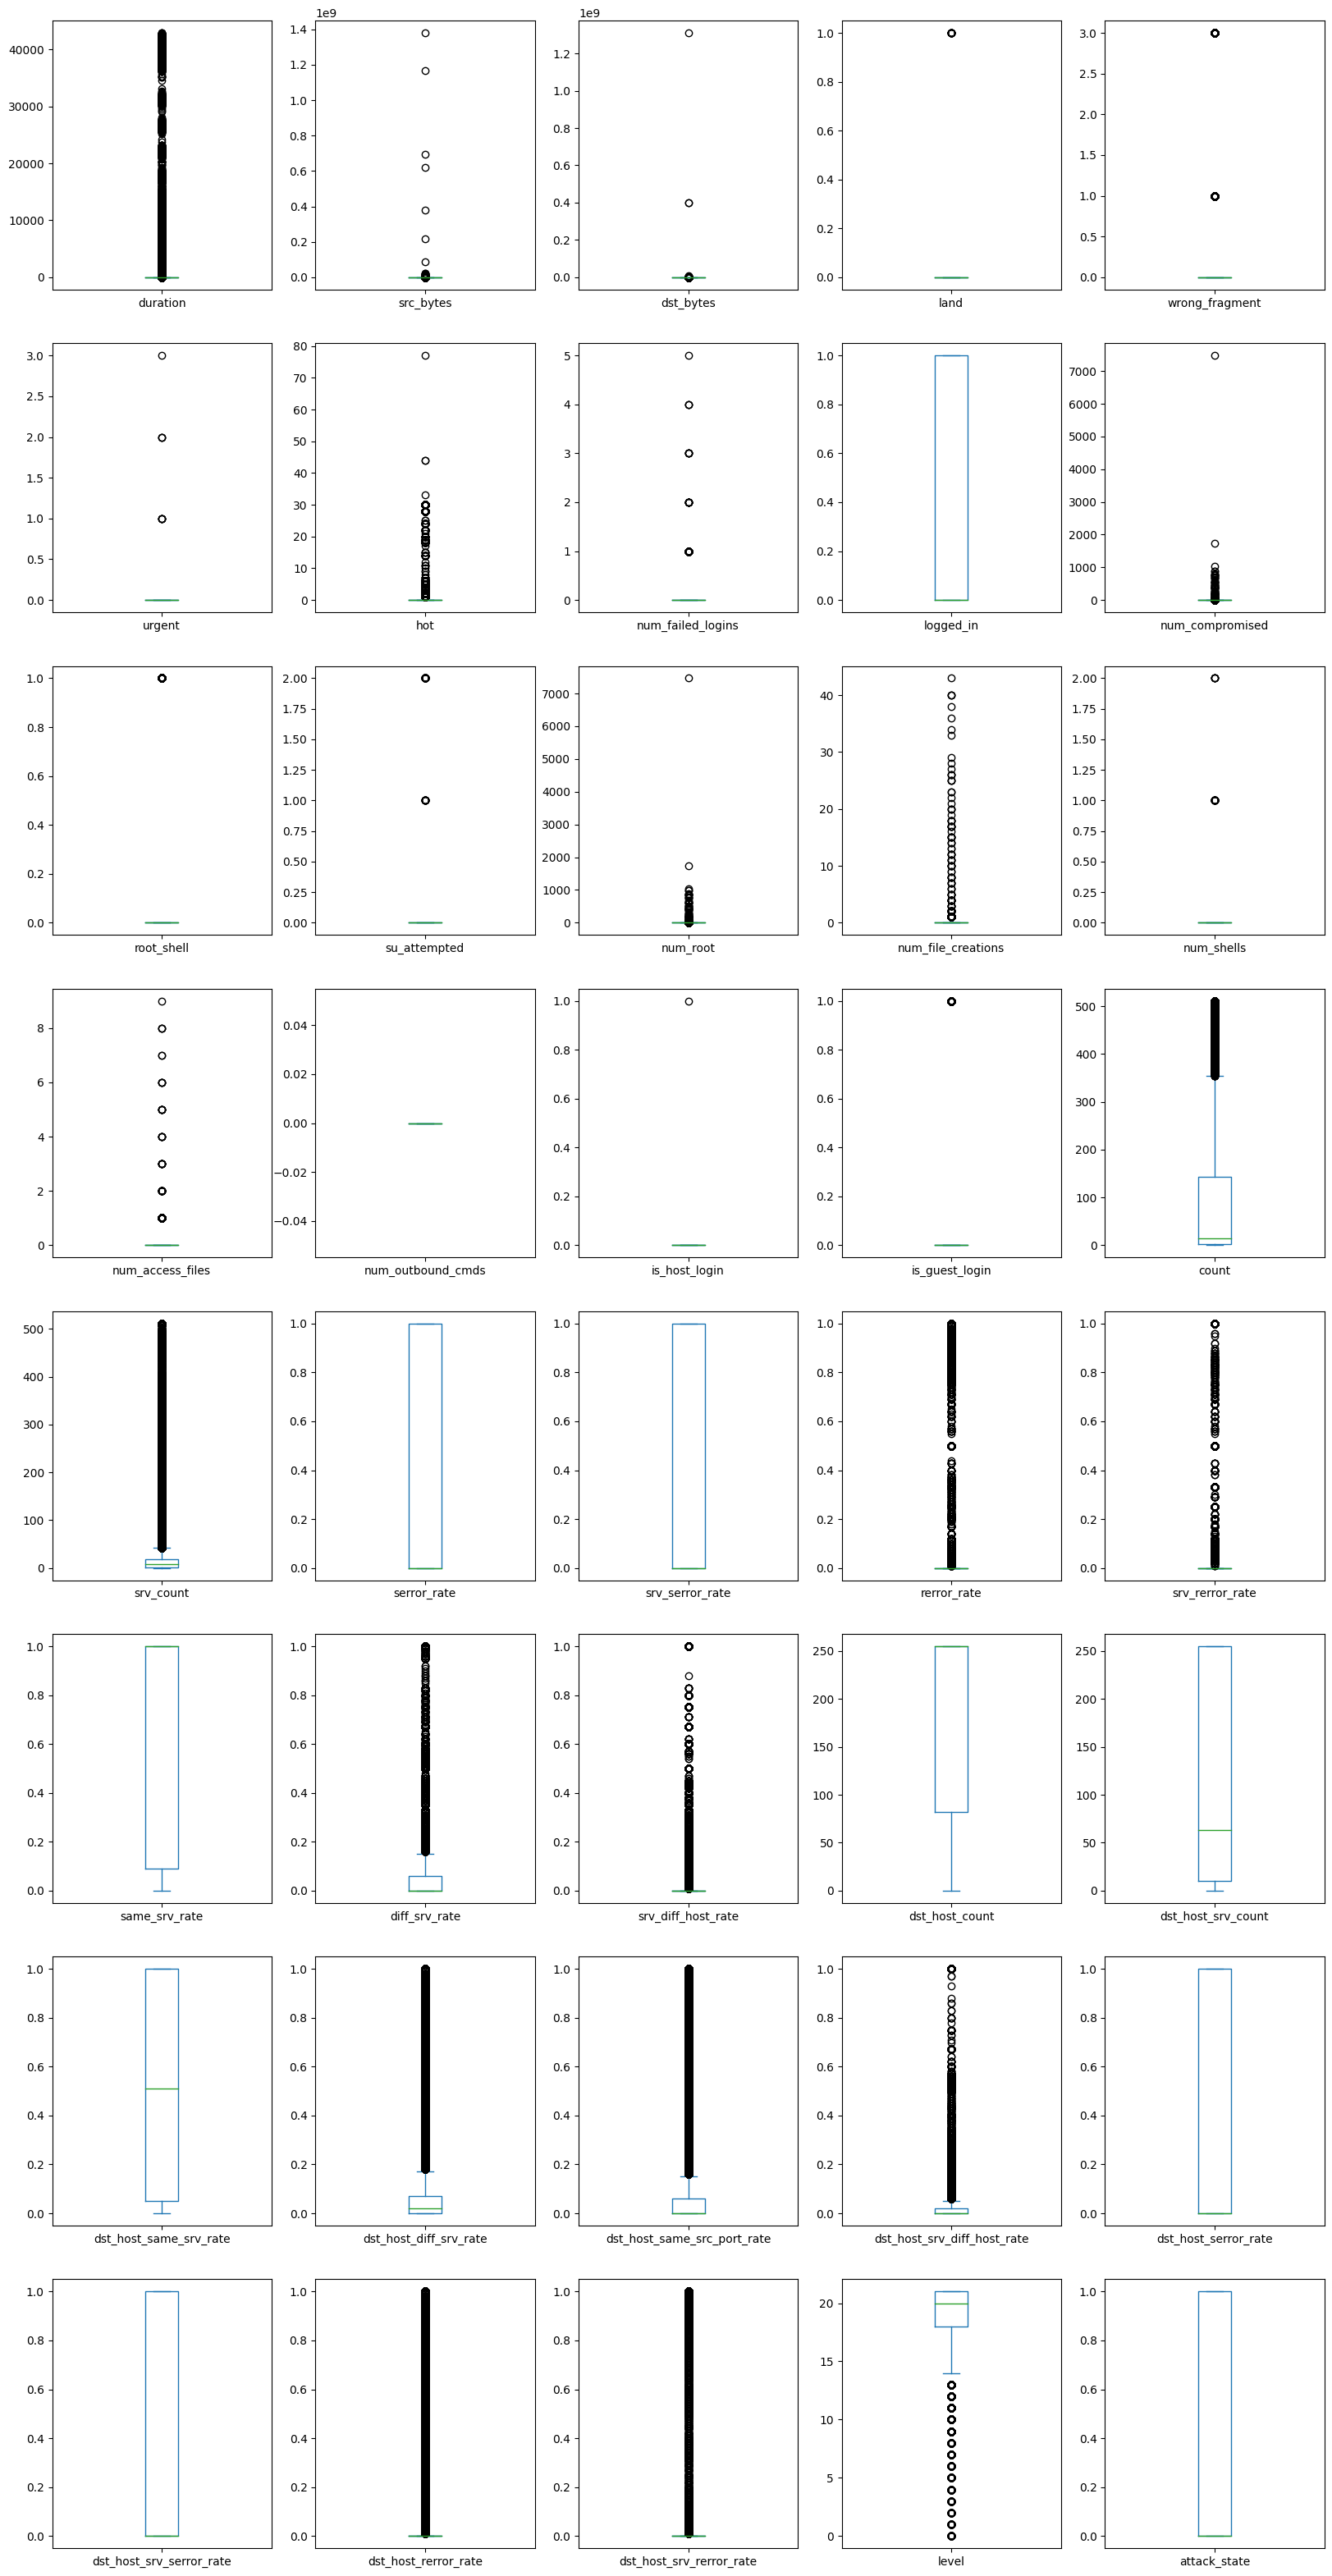

In [17]:
Trained_Data.plot(kind='box',subplots=True,layout=(8,5),figsize=(20,40))
plt.show()


## 2.2 Data Encoding

In [18]:
Trained_Data = pd.get_dummies(Trained_Data,columns=['protocol_type','service','flag'],prefix="",prefix_sep="")

In [19]:
LE = LabelEncoder()
attack_LE= LabelEncoder()
Trained_Data['attack'] = attack_LE.fit_transform(Trained_Data["attack"])

## 2.3 Data Splitting

In [20]:
X_train = Trained_Data.drop('attack_state', axis = 1)
Y_train = Trained_Data['attack_state']
X_train,X_test ,Y_train,Y_test = train_test_split(X_train, Y_train, test_size= 0.25 , random_state=42)


## 2.4 Data Scaling

In [21]:
Ro_scaler = RobustScaler()
X_train= Ro_scaler.fit_transform(X_train) 
X_test= Ro_scaler.transform(X_test)

In [22]:
X_test.shape, Y_test.shape

((31493, 124), (31493,))

In [23]:
X_train.shape, Y_train.shape

((94479, 124), (94479,))


## 2.5 Statistical Analysis Using GLM


In [24]:
A = sm.add_constant(X_train)
Est1 = sm.GLM(Y_train, A)
Est2 = Est1.fit()
Est2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           attack_state   No. Observations:                94479
Model:                            GLM   Df Residuals:                    94359
Model Family:                Gaussian   Df Model:                          119
Link Function:               Identity   Scale:                        0.021912
Method:                          IRLS   Log-Likelihood:                 46489.
Date:                Thu, 03 Apr 2025   Deviance:                       2067.6
Time:                        03:43:36   Pearson chi2:                 2.07e+03
No. Iterations:                     3   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0044      0.006     -0.731      0.465      -0.016       0.007
x1         -4.683e-06   2.28e-07    -20.562      0.000   -5.13e-06   -4.24e-06
x2          3.099e-08   2.73e-08      1.135      0.256   -2.25e-08    8.45e-08
x3         -5.859e-08   5.73e-08     -1.022      0.307   -1.71e-07    5.37e-08
x4            -0.3991      0.035    -11.546      0.000      -0.467      -0.331
x5             0.1391      0.002     58.491      0.000       0.134       0.144
x6            -0.0225      0.030     -0.746      0.456      -0.082       0.037
x7             0.0123      0.000     27.696      0.000       0.011       0.013
x8            -0.0873      0.011     -7.631      0.000      -0.110      -0.065
x9             0.1557      0.004     40.417      0.000       0.148       0.163
x10            0.0030      0.001      5.126      0.000       0.002       0.004
x11           -0.0209      0.017     -1.213      0.225      -0.055       0.013
x12           -0.0407      0.017     -2.358      0.018      -0.074      -0.007
x13           -0.0030      0.001     -5.108      0.000      -0.004      -0.002
x14           -0.0115      0.001    -11.844      0.000      -0.013      -0.010
x15           -0.1066      0.023     -4.724      0.000      -0.151      -0.062
x16            0.0101      0.006      1.578      0.115      -0.002       0.023
x17         3.322e-15   5.93e-16      5.605      0.000    2.16e-15    4.48e-15
x18           -0.3446      0.148     -2.326      0.020      -0.635      -0.054
x19           -0.2970      0.012    -23.973      0.000      -0.321      -0.273
x20            0.0373      0.001     25.736      0.000       0.034       0.040
x21            0.0015      0.000      6.384      0.000       0.001       0.002
x22           -0.0567      0.012     -4.691      0.000      -0.080      -0.033
x23            0.2890      0.013     21.988      0.000       0.263       0.315
x24           -0.1072      0.013     -8.167      0.000      -0.133      -0.081
x25            0.5552      0.015     36.906      0.000       0.526       0.585
x26           -0.3315      0.004    -84.984      0.000      -0.339      -0.324
x27           -0.0078      0.000    -30.328      0.000      -0.008      -0.007
x28            0.0555      0.002     23.000      0.000       0.051       0.060
x29            0.0551      0.001     42.191      0.000       0.053       0.058
x30           -0.0984      0.003    -29.568      0.000      -0.105      -0.092
x31            0.0048      0.004      1.224      0.221      -0.003       0.012
x32            0.0099      0.000     29.578      0.000       0.009       0.011
x33            0.0072      0.000     40.259      0.000       0.007       0.008
x34            0.0020      0.000     14.745      0.000       0.002       0.002
x35           -0.0746      0.007     -9.960      0.000      -0.089      -0.060
x3

## 2.6 Evaluating Function

In [25]:
def Evaluate(Model_Name, Model_Abb, X_test, Y_test):
    
    Pred_Value= Model_Abb.predict(X_test)
    Accuracy = metrics.accuracy_score(Y_test,Pred_Value)                      
    Sensitivity = metrics.recall_score(Y_test,Pred_Value)
    Precision = metrics.precision_score(Y_test,Pred_Value)
    F1_score = metrics.f1_score(Y_test,Pred_Value)
    Recall = metrics.recall_score(Y_test,Pred_Value)
    
    print('--------------------------------------------------\n')
    print('The {} Model Accuracy   = {}\n'.format(Model_Name, np.round(Accuracy,3)))
    print('The {} Model Sensitvity = {}\n'.format(Model_Name, np.round(Sensitivity,3)))
    print('The {} Model Precision  = {}\n'.format(Model_Name, np.round(Precision,3)))
    print('The {} Model F1 Score   = {}\n'.format(Model_Name, np.round(F1_score,3)))
    print('The {} Model Recall     = {}\n'.format(Model_Name, np.round(Recall,3)))
    print('--------------------------------------------------\n')
    
    Confusion_Matrix = metrics.confusion_matrix(Y_test, Pred_Value)
    plot_confusion_matrix(Confusion_Matrix,class_names=['Normal', 'Attack'],figsize=(5.55,5), colorbar= "blue")
    RocCurveDisplay.from_estimator(Model_Abb, X_test, Y_test)
    plt.show()

## 2.7 Grid Search Function

In [26]:
def GridSearch(Model_Abb, Parameters, X_train, Y_train):
    Grid = GridSearchCV(estimator=Model_Abb, param_grid= Parameters, cv = 3, n_jobs=-1)
    Grid_Result = Grid.fit(X_train, Y_train)
    Model_Name = Grid_Result.best_estimator_
    
    return (Model_Name)

# 3.MODELS

## 3.1 Logistic Regression

In [27]:
LR= LogisticRegression()
LR.fit(X_train , Y_train)

LogisticRegression()

In [28]:
LR.score(X_train, Y_train), LR.score(X_test, Y_test)

(0.8714211623747076, 0.8707331788016385)

--------------------------------------------------

The Logistic Regression Model Accuracy   = 0.871

The Logistic Regression Model Sensitvity = 0.926

The Logistic Regression Model Precision  = 0.821

The Logistic Regression Model F1 Score   = 0.87

The Logistic Regression Model Recall     = 0.926

--------------------------------------------------



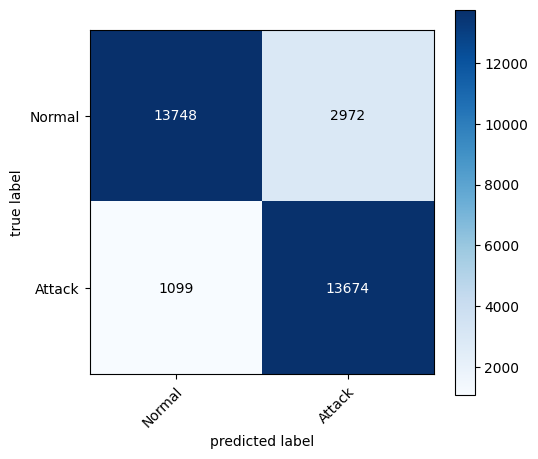

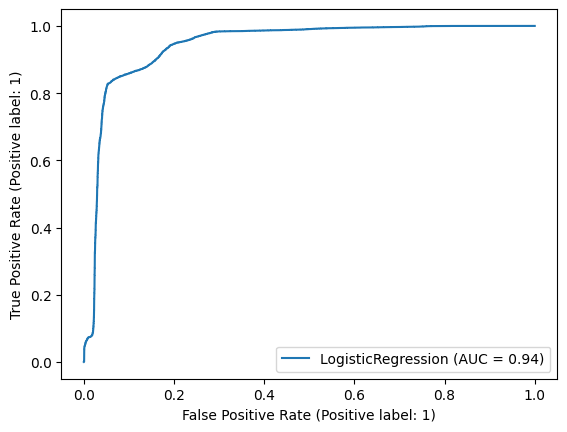

In [29]:
Evaluate('Logistic Regression', LR, X_test, Y_test)

## 3.2 Decision Tree Classifier

In [30]:
DT =DecisionTreeClassifier(max_features=6, max_depth=4)
DT.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=4, max_features=6)

In [31]:
DT.score(X_train, Y_train), DT.score(X_test, Y_test)

(0.9593560473756073, 0.9581811831200584)

--------------------------------------------------

The Decision Tree Classifier Model Accuracy   = 0.958

The Decision Tree Classifier Model Sensitvity = 0.974

The Decision Tree Classifier Model Precision  = 0.939

The Decision Tree Classifier Model F1 Score   = 0.956

The Decision Tree Classifier Model Recall     = 0.974

--------------------------------------------------



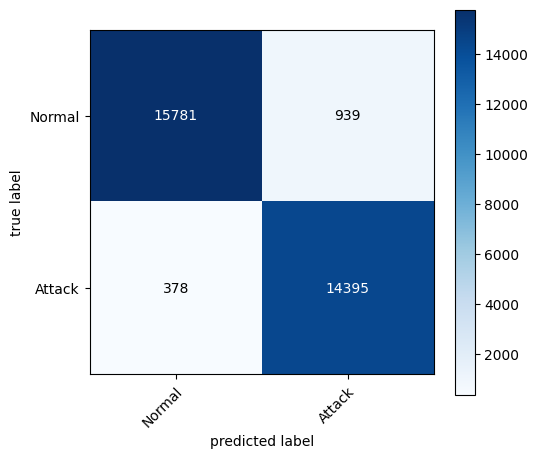

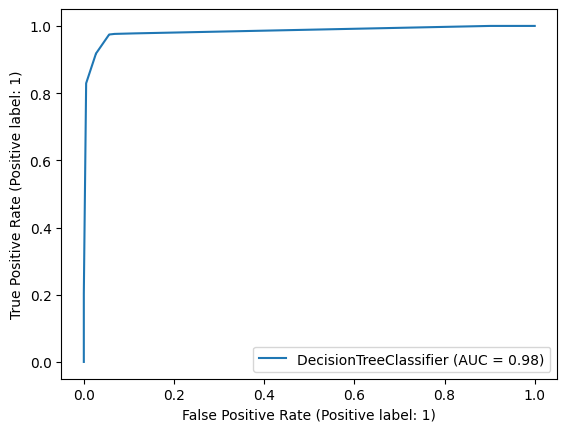

In [32]:
Evaluate('Decision Tree Classifier', DT, X_test, Y_test)

[Text(0.4375, 0.9, 'x[26] <= 0.583\ngini = 0.497\nsamples = 94479\nvalue = [50622, 43857]'),
 Text(0.20833333333333334, 0.7, 'x[38] <= 0.25\ngini = 0.288\nsamples = 58392\nvalue = [48225, 10167]'),
 Text(0.16666666666666666, 0.5, 'x[1] <= -0.092\ngini = 0.168\nsamples = 53148\nvalue = [48225, 4923]'),
 Text(0.08333333333333333, 0.3, 'x[67] <= 0.5\ngini = 0.496\nsamples = 7285\nvalue = [3321, 3964]'),
 Text(0.041666666666666664, 0.1, 'gini = 0.336\nsamples = 4949\nvalue = [1057, 3892]'),
 Text(0.125, 0.1, 'gini = 0.06\nsamples = 2336\nvalue = [2264, 72]'),
 Text(0.25, 0.3, 'x[97] <= 0.5\ngini = 0.041\nsamples = 45863\nvalue = [44904, 959]'),
 Text(0.20833333333333334, 0.1, 'gini = 0.046\nsamples = 40892\nvalue = [39933, 959]'),
 Text(0.2916666666666667, 0.1, 'gini = 0.0\nsamples = 4971\nvalue = [4971, 0]'),
 Text(0.25, 0.5, 'gini = 0.0\nsamples = 5244\nvalue = [0, 5244]'),
 Text(0.6666666666666666, 0.7, 'x[30] <= -0.205\ngini = 0.124\nsamples = 36087\nvalue = [2397, 33690]'),
 Text(0.5,

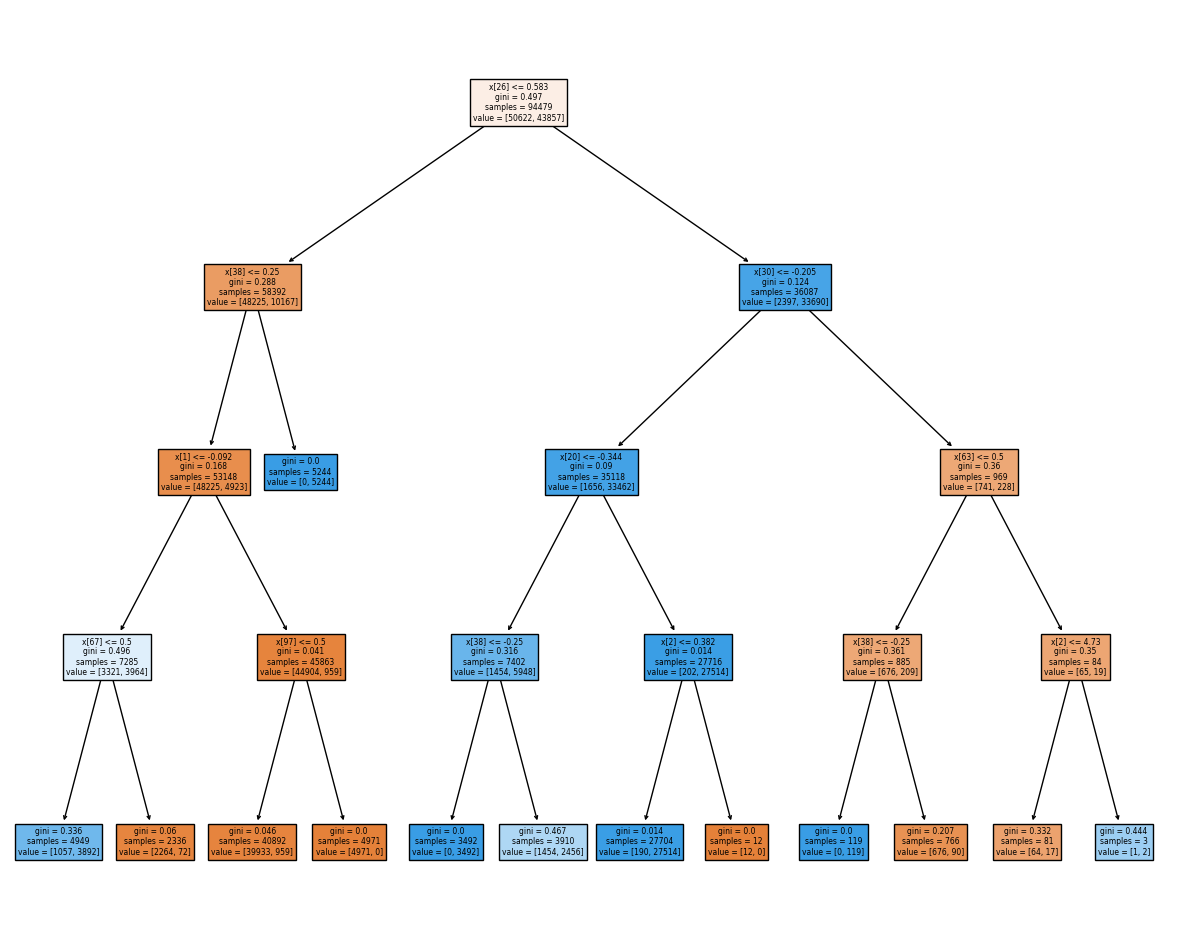

In [33]:
fig = plt.figure(figsize=(15,12))
tree.plot_tree(DT, filled=True)

### 3.2.1 Interpreting Decision Tree Predictions Using SHAP 

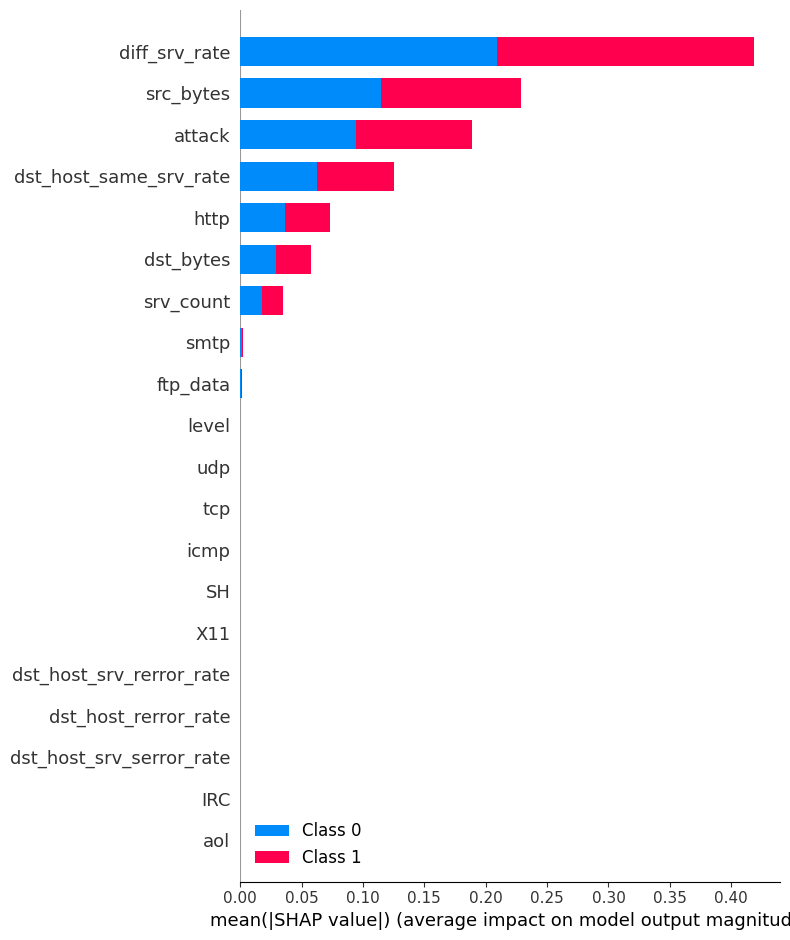

In [34]:
best_model = DT  
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test[:100])
X_test_df = pd.DataFrame(X_test, columns=Trained_Data.drop('attack_state', axis=1).columns)
shap.summary_plot(shap_values, X_test[:100], feature_names=X_test_df.columns)

## 3.3 Random Forest Classifier

In [35]:
max_depth= [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
    
Parameters={ 'max_depth': max_depth}

In [36]:
RF= RandomForestClassifier()
GridSearch(RF, Parameters, X_train, Y_train)

RandomForestClassifier(max_depth=10)

In [37]:
RF.fit(X_train, Y_train)

RandomForestClassifier()

In [38]:
RF.score(X_train, Y_train), RF.score(X_test, Y_test)

(1.0, 1.0)

--------------------------------------------------

The Random Forest Classifier Model Accuracy   = 1.0

The Random Forest Classifier Model Sensitvity = 1.0

The Random Forest Classifier Model Precision  = 1.0

The Random Forest Classifier Model F1 Score   = 1.0

The Random Forest Classifier Model Recall     = 1.0

--------------------------------------------------



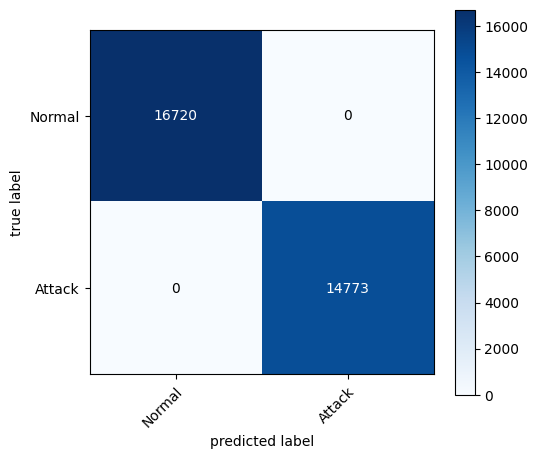

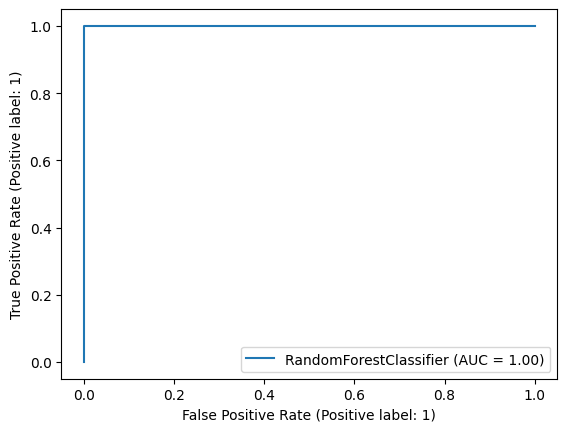

In [39]:
Evaluate('Random Forest Classifier', RF, X_test, Y_test)

### 3.3.1 Interpreting Random Forest  Predictions Using SHAP 

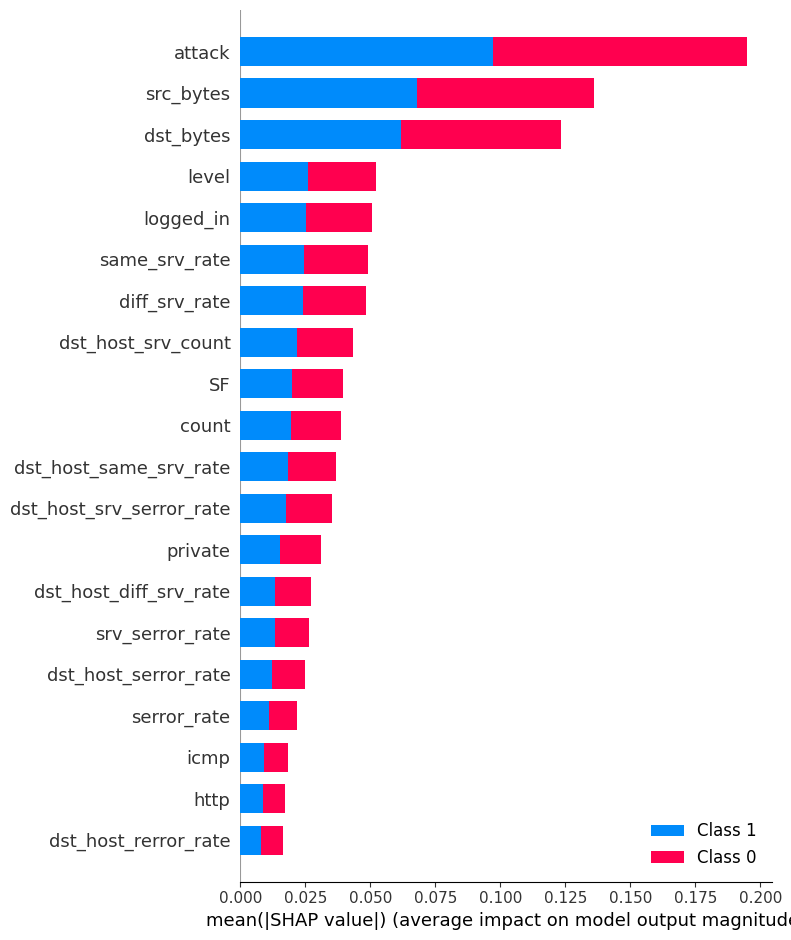

In [40]:


best_model = RF  
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test[:100])

X_test_df = pd.DataFrame(X_test, columns=Trained_Data.drop('attack_state', axis=1).columns)
shap.summary_plot(shap_values, X_test[:100], feature_names=X_test_df.columns)

## 3.4 KNN-Model

In [41]:
KNN= KNeighborsClassifier(n_neighbors=6) 
KNN.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=6)

In [42]:
KNN.score(X_train, Y_train), KNN.score(X_test, Y_test)

(0.9957556705722965, 0.9949195059219509)

--------------------------------------------------

The KNN Model Accuracy   = 0.995

The KNN Model Sensitvity = 0.993

The KNN Model Precision  = 0.996

The KNN Model F1 Score   = 0.995

The KNN Model Recall     = 0.993

--------------------------------------------------



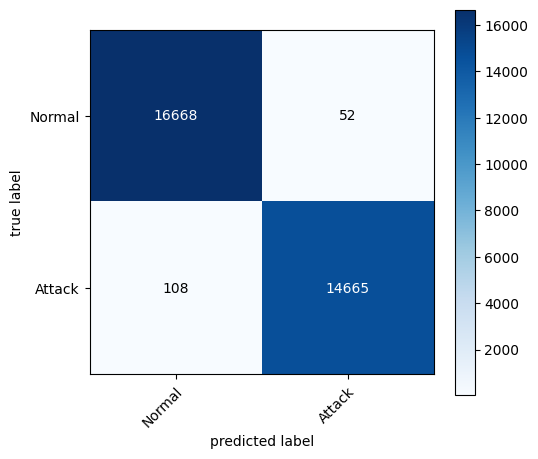

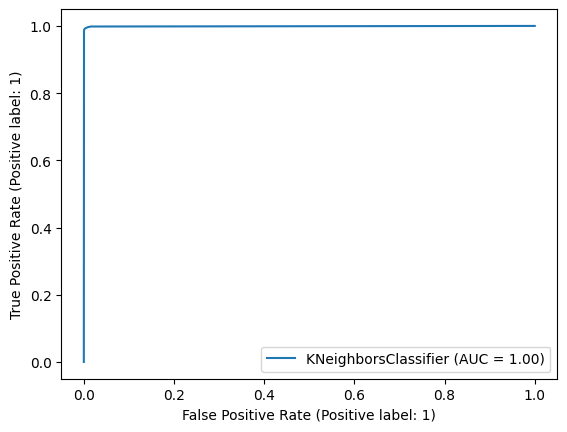

In [43]:
Evaluate('KNN', KNN, X_test, Y_test)


## 3.5 SVM Classifier (KERNEL=1)

In [44]:
Linear_SVC = svm.LinearSVC(C=1)
Linear_SVC.fit(X_train, Y_train)

LinearSVC(C=1)

In [45]:
Linear_SVC.score(X_train, Y_train), Linear_SVC.score(X_test, Y_test)

(0.9788206903121328, 0.9789159495760963)

--------------------------------------------------

The SVM Linear SVC Kernel Model Accuracy   = 0.979

The SVM Linear SVC Kernel Model Sensitvity = 0.977

The SVM Linear SVC Kernel Model Precision  = 0.978

The SVM Linear SVC Kernel Model F1 Score   = 0.978

The SVM Linear SVC Kernel Model Recall     = 0.977

--------------------------------------------------



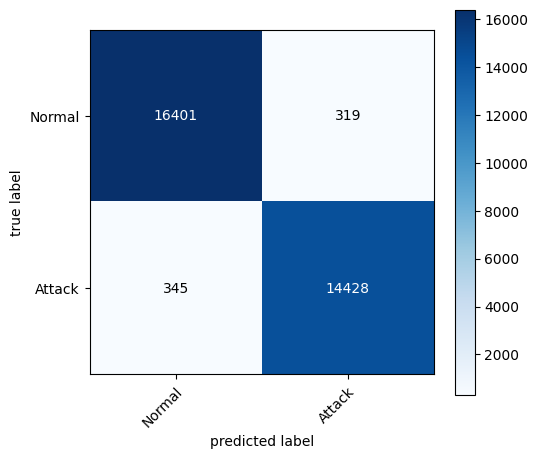

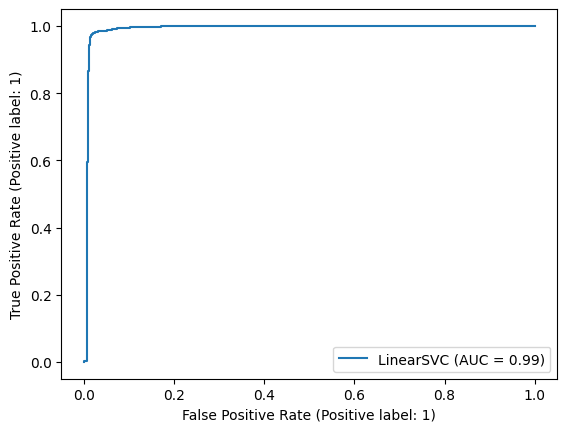

In [46]:
Evaluate('SVM Linear SVC Kernel', Linear_SVC, X_test, Y_test)

--------------------------------------------------

The XGBoost Classifier Model Accuracy   = 1.0

The XGBoost Classifier Model Sensitvity = 1.0

The XGBoost Classifier Model Precision  = 1.0

The XGBoost Classifier Model F1 Score   = 1.0

The XGBoost Classifier Model Recall     = 1.0

--------------------------------------------------



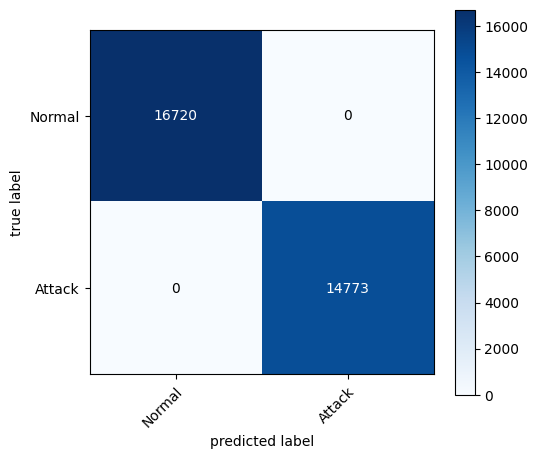

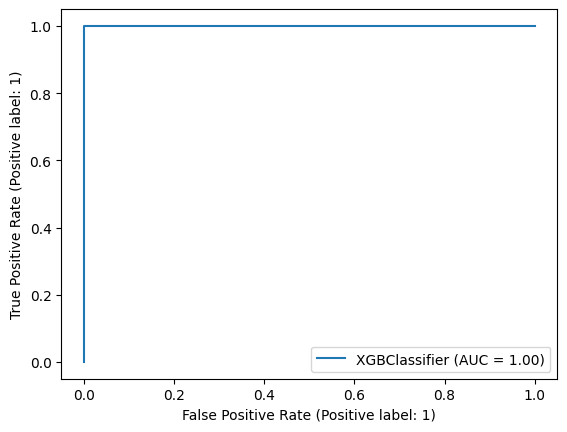

In [47]:
from xgboost import XGBClassifier

XGB = XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1)
XGB.fit(X_train, Y_train)
Evaluate('XGBoost Classifier', XGB, X_test, Y_test)